K-Means Clustering

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [56]:
# Load dataset
df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/processed/processed_train.csv')
df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,0.814401,0.233626,0.132828,-0.015186,-0.311880,0.333710,0.216256,-0.165217,-0.279675,0.001896,0.220046,-0.250754,0.023256,-0.098973,-0.027108,-0.014240
1,0.788769,0.214497,0.126871,0.001028,-0.360252,0.424255,0.208152,0.141608,0.328986,0.056779,-0.144269,-0.108526,-0.155290,-0.085865,0.077608,-0.107197
2,0.786633,0.233628,0.162003,-0.008777,-0.408683,0.422581,0.207997,-0.058942,-0.019996,0.252224,0.267590,0.198441,0.027936,-0.106465,-0.125444,-0.104068
3,0.792041,0.239691,0.151408,-0.005893,-0.376406,0.378263,0.252594,-0.091477,-0.117862,0.072759,-0.146978,0.012128,0.144868,0.039337,0.053666,0.134730
4,0.790116,0.234139,0.139443,0.004712,-0.392245,0.447621,0.197345,-0.009376,0.306702,0.040068,-0.076781,-0.106108,-0.018365,0.093827,-0.024956,0.131445


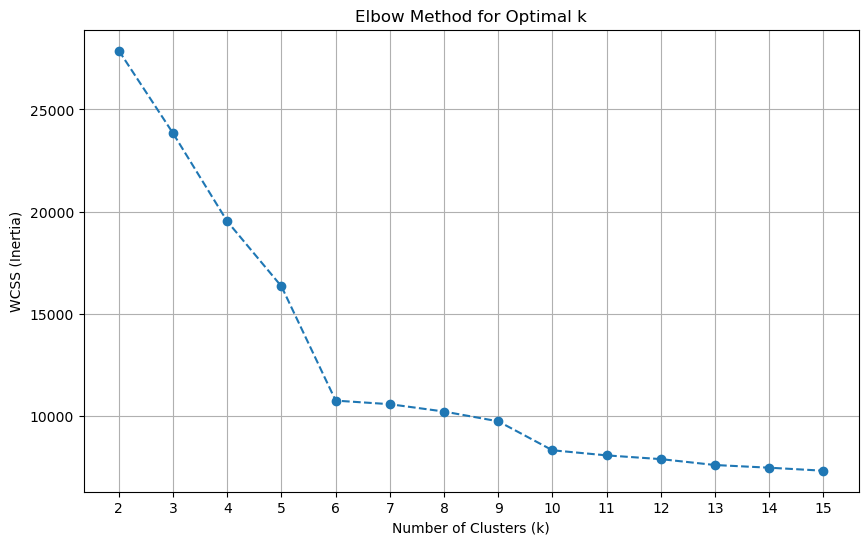

In [57]:
# Determine the Optimal Number of Clusters (k)

# Method A: Elbow Method (using Inertia/WCSS)
wcss = [] # Within-Cluster Sum of Squares
k_range = range(2, 16) # Test k values from 2 up to 15

for k in k_range:
    kmeans_test = KMeans(n_clusters=k,
                         init='k-means++', # Recommended initialization method
                         n_init='auto',    # Automatically run multiple initializations
                         random_state=42)  # For reproducibility
    kmeans_test.fit(df)
    wcss.append(kmeans_test.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()




Calculated Silhouette Score for k=2: 0.1857
Calculated Silhouette Score for k=3: 0.2564
Calculated Silhouette Score for k=4: 0.3321
Calculated Silhouette Score for k=5: 0.3866
Calculated Silhouette Score for k=6: 0.4891
Calculated Silhouette Score for k=7: 0.4034
Calculated Silhouette Score for k=8: 0.3863
Calculated Silhouette Score for k=9: 0.3078
Calculated Silhouette Score for k=10: 0.3348


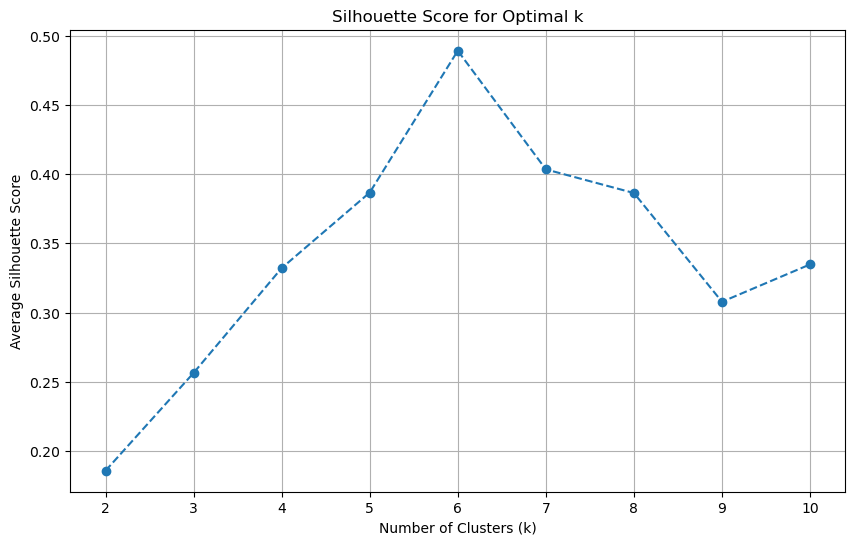

In [58]:
# Method B: Silhouette Score
silhouette_scores = []
k_range_silhouette = range(2, 11) # Test fewer k values due to computation time

for k in k_range_silhouette:
    kmeans_test = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    cluster_labels = kmeans_test.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Calculated Silhouette Score for k={k}: {silhouette_avg:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()


In [59]:
# Choose k and Run K-Means Clustering

chosen_k = 6

kmeans = KMeans(n_clusters=chosen_k,
                init='k-means++',
                n_init='auto',
                max_iter=300,
                random_state=42)
# Fit the model and predict cluster labels
clusters = kmeans.fit_predict(df)
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
kmeans.cluster_centers_

Cluster centers shape: (6, 16)


array([[-2.63878759e-01, -5.37363075e-01,  6.88076287e-01,
        -1.02841055e-01, -8.28957479e-02, -3.76710030e-02,
        -2.28141001e-03,  1.11832783e-02, -3.89109045e-03,
        -3.06633962e-02,  5.60812029e-03,  1.52042758e-03,
        -2.99214080e-03,  4.24666955e-03,  6.52161401e-04,
        -2.00729684e-03],
       [-1.79751673e-01, -2.20280527e-01, -3.32839899e-01,
         8.11949633e-01, -2.19665581e-01, -5.07281159e-02,
        -1.72864831e-02,  2.18350548e-02, -1.34410248e-02,
        -2.73640289e-02,  1.06442192e-02,  6.02839635e-03,
         2.71263439e-03,  7.47786393e-03,  1.00035429e-03,
        -1.03425418e-03],
       [ 8.04546025e-01,  1.51044148e-01,  6.66367978e-02,
        -2.84086106e-02, -4.73531520e-02, -1.36780997e-02,
        -1.04048000e-02,  1.28936501e-02, -1.16494455e-03,
        -1.03282359e-02,  8.83212585e-04,  5.81393544e-03,
        -2.86118439e-04,  3.99928812e-03,  3.29605927e-04,
        -1.55884115e-03],
       [-2.00061620e-01, -3.04006327e

In [68]:
#  Add Cluster Labels to DataFrame

df['cluster'] = clusters

# Analyze cluster sizes
print(df['cluster'].value_counts().sort_index())

cluster
0    4603
1    3844
2    7038
3    4032
4    3401
5    5444
Name: count, dtype: int64


In [69]:
df.head

<bound method NDFrame.head of            PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0      0.814401  0.233626  0.132828 -0.015186 -0.311880  0.333710  0.216256   
1      0.788769  0.214497  0.126871  0.001028 -0.360252  0.424255  0.208152   
2      0.786633  0.233628  0.162003 -0.008777 -0.408683  0.422581  0.207997   
3      0.792041  0.239691  0.151408 -0.005893 -0.376406  0.378263  0.252594   
4      0.790116  0.234139  0.139443  0.004712 -0.392245  0.447621  0.197345   
...         ...       ...       ...       ...       ...       ...       ...   
28357 -0.083234 -0.123701 -0.107574  0.021975  0.492684 -0.609807  0.210735   
28358 -0.076783 -0.127896 -0.105756  0.020644  0.437323 -0.533258  0.075322   
28359 -0.075246 -0.152119 -0.127599  0.020587  0.469841 -0.552808  0.094538   
28360 -0.073692 -0.147374 -0.118733  0.039369  0.466124 -0.570297  0.163230   
28361 -0.061504 -0.163262 -0.133360  0.042724  0.564576 -0.672929  0.322220   

           PC_8      

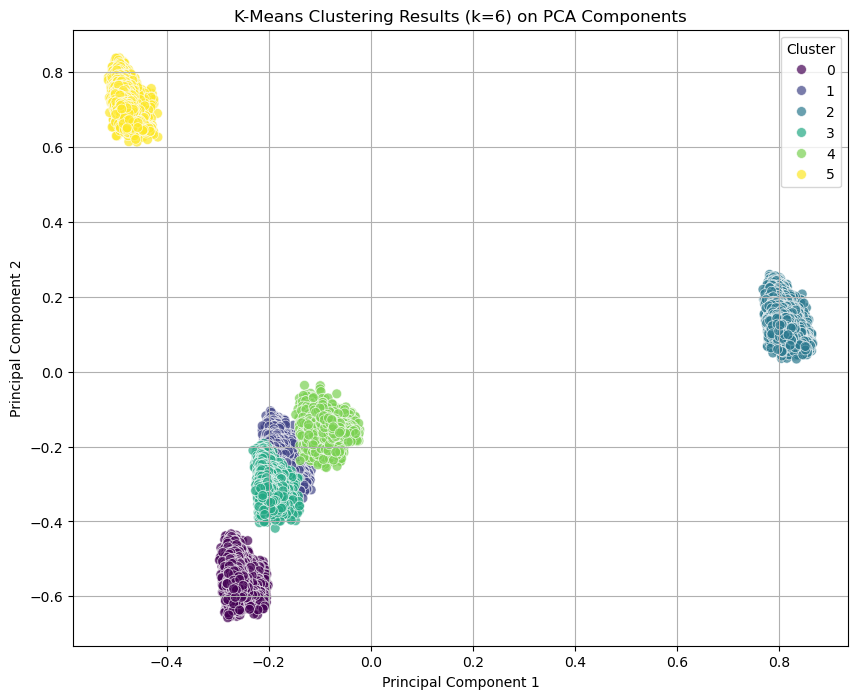

In [61]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['PC_1'], y=df['PC_2'], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title(f'K-Means Clustering Results (k={chosen_k}) on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
